Used car price prediction

Name: S. M. Mahamudul Haque

ID: 201-15-13707

section: 55_G

course code: CSE 413

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
sns.set() # all plot will cover on seaborn style

import dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/autos3.csv")

In [ ]:
df.shape

(101019, 10)

In [ ]:
df.head(6)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN
1,18300,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja
2,9800,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN
3,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
5,650,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.head(6 )

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN
1,18300,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja
2,9800,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN
3,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
5,650,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja


removing null values

In [ ]:
df.isnull().sum()

price                     0
vehicleType           10185
yearOfRegistration        0
gearbox                5452
powerPS                   0
model                  5545
kilometer                 0
fuelType               9137
brand                     0
notRepairedDamage     19539
dtype: int64

<Axes: >

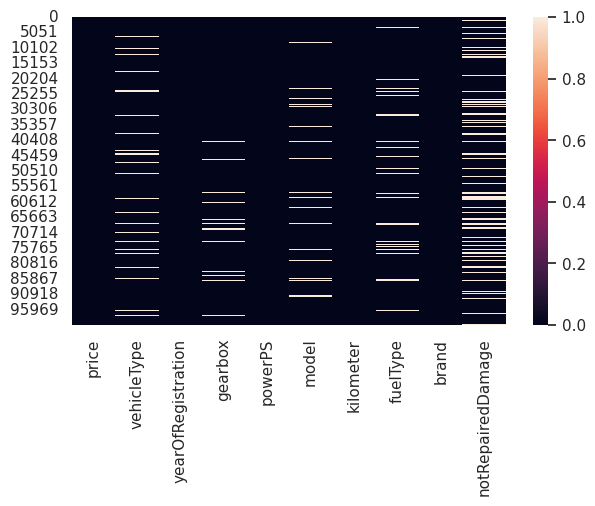

In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(df.isnull())

In [ ]:
df.shape[0]

101019

In [ ]:
null_var = df.isnull().sum()/df.shape[0]*100
null_var

price                  0.000000
vehicleType           10.082262
yearOfRegistration     0.000000
gearbox                5.397005
powerPS                0.000000
model                  5.489066
kilometer              0.000000
fuelType               9.044833
brand                  0.000000
notRepairedDamage     19.341906
dtype: float64

In [ ]:
drop_columns = null_var[null_var>25].keys()
drop_columns

Index([], dtype='object')

In [ ]:
df2_drop_clm=df.drop(columns=drop_columns)

In [ ]:
df2_drop_clm.shape

(101019, 10)

<Axes: >

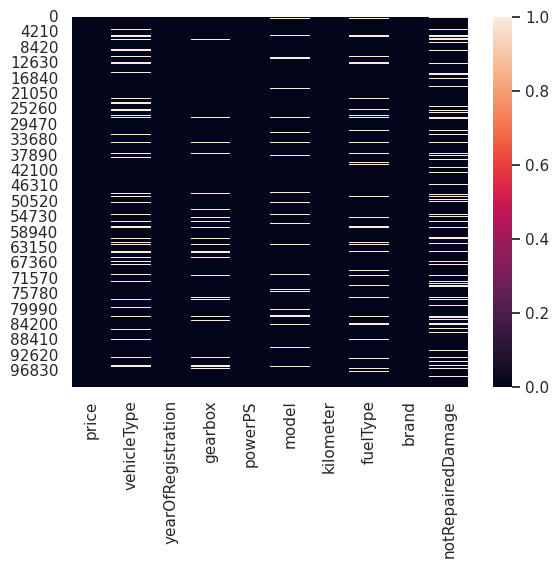

In [ ]:
sns.heatmap(df2_drop_clm.isnull())

dropping rows

In [ ]:
df3_drop_rows = df2_drop_clm.dropna()

In [ ]:
df3_drop_rows.shape

(71133, 10)

<Axes: >

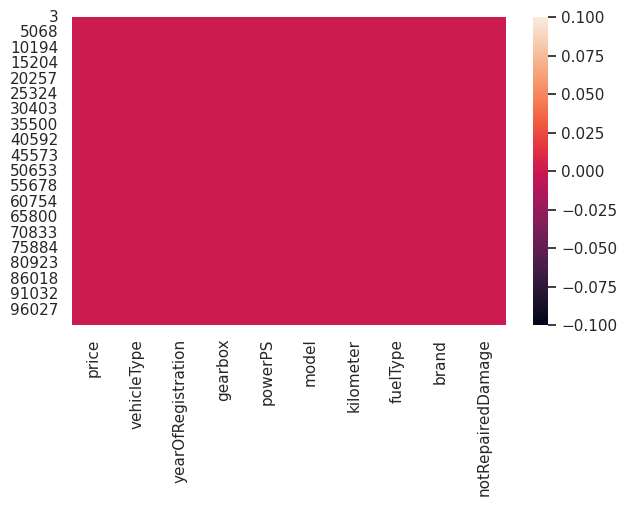

In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(df3_drop_rows.isnull())

In [ ]:
df3_drop_rows.isnull().sum().sum()

0

In [ ]:
df3_drop_rows.head(3)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
3,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
5,650,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja


In [ ]:
df3_drop_rows.shape

(71133, 10)

 Feature engineering

Dealing with outliers(quantile method)

In [ ]:
df3_drop_rows.describe()

,price,yearOfRegistration,powerPS,kilometer
count,7.113300e+04,71133.000000,71133.000000,71133.000000
mean,7.234202e+03,2003.328525,125.974513,123865.364880
std,6.624727e+04,6.507337,122.703372,39938.381024
min,0.000000e+00,1931.000000,0.000000,5000.000000
25%,1.500000e+03,1999.000000,79.000000,100000.000000
50%,3.850000e+03,2004.000000,116.000000,150000.000000
75%,8.650000e+03,2008.000000,150.000000,150000.000000
max,1.000000e+07,2018.000000,17322.000000,150000.000000


quantile for price

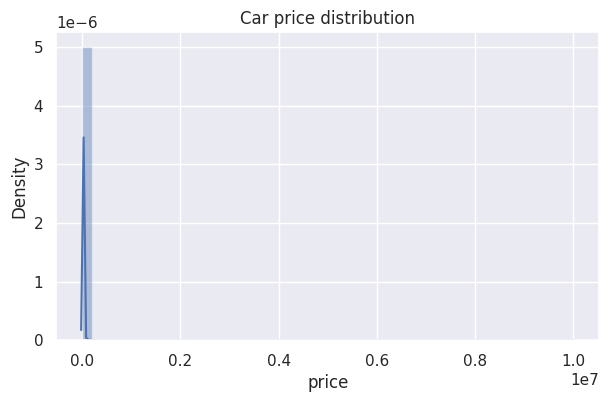

In [ ]:
plt.figure(figsize=(7,4))
sns.distplot(df3_drop_rows['price']);
plt.title('Car price distribution');

In [ ]:
q= df3_drop_rows['price'].quantile (q= 0.9)
q

15980.0

In [ ]:
#updating the data
df4_q = df3_drop_rows[df3_drop_rows['price']<q]
df4_q.describe() # checking the data.

,price,yearOfRegistration,powerPS,kilometer
count,64018.000000,64018.000000,64018.000000,64018.000000
mean,4543.112297,2002.642710,116.285404,128877.971820
std,3933.796673,5.955703,101.722625,35729.769677
min,0.000000,1937.000000,0.000000,5000.000000
25%,1400.000000,1999.000000,75.000000,125000.000000
50%,3200.000000,2003.000000,109.000000,150000.000000
75%,6800.000000,2007.000000,143.000000,150000.000000
max,15975.000000,2018.000000,11530.000000,150000.000000


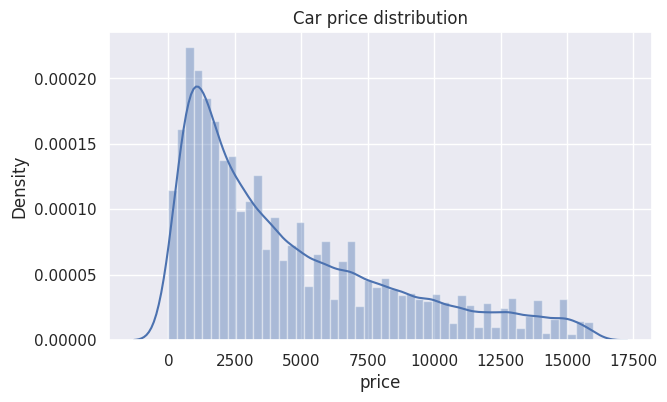

In [ ]:
plt.figure(figsize=(7,4))
sns.distplot(df4_q['price']);
plt.title('Car price distribution');

In [ ]:
q1= df4_q['price'].quantile (0.03)
q1

250.0

In [ ]:
df4_q1 = df4_q[df4_q['price']>q1]
df4_q1.describe()

,price,yearOfRegistration,powerPS,kilometer
count,62083.000000,62083.000000,62083.000000,62083.000000
mean,4681.999726,2002.790635,117.072097,128682.731182
std,3913.895844,5.908324,92.774590,35712.007843
min,251.000000,1937.000000,0.000000,5000.000000
25%,1500.000000,1999.000000,75.000000,125000.000000
50%,3400.000000,2003.000000,110.000000,150000.000000
75%,6950.000000,2007.000000,145.000000,150000.000000
max,15975.000000,2018.000000,11530.000000,150000.000000


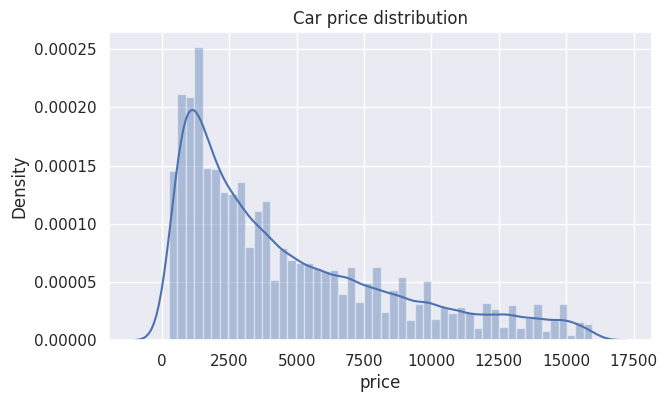

In [ ]:
plt.figure(figsize=(7,4))
sns.distplot(df4_q1['price']);
plt.title('Car price distribution');

quantile for yearOfRegistration

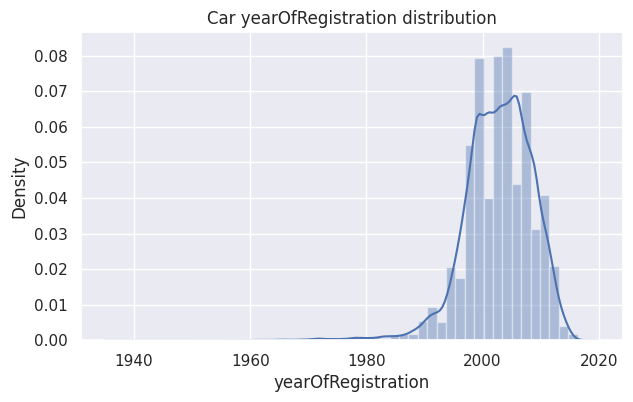

In [ ]:
plt.figure(figsize=(7,4))
sns.distplot(df4_q1['yearOfRegistration']);
plt.title('Car yearOfRegistration distribution');

In [ ]:
q2= df4_q1['yearOfRegistration'].quantile (0.1)
q2

1996.0

In [ ]:
df4_q2 = df4_q1[df4_q1['yearOfRegistration']>q2]
df4_q2.describe()

,price,yearOfRegistration,powerPS,kilometer
count,55220.000000,55220.000000,55220.000000,55220.000000
mean,4964.468109,2004.139986,118.877689,127902.933720
std,3943.456807,4.299597,94.243810,36016.065191
min,270.000000,1997.000000,0.000000,5000.000000
25%,1750.000000,2001.000000,77.000000,125000.000000
50%,3750.000000,2004.000000,110.000000,150000.000000
75%,7300.000000,2007.000000,147.000000,150000.000000
max,15975.000000,2018.000000,11530.000000,150000.000000


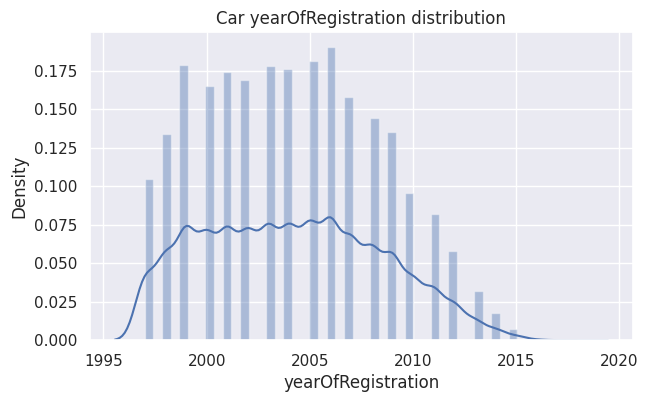

In [ ]:
plt.figure(figsize=(7,4))
sns.distplot(df4_q2['yearOfRegistration']);
plt.title('Car yearOfRegistration distribution');

quantile for powerPS

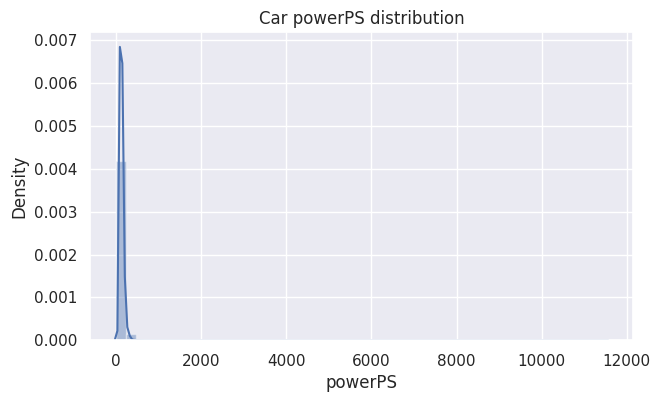

In [ ]:
plt.figure(figsize=(7,4))
sns.distplot(df4_q2['powerPS']);
plt.title('Car powerPS distribution');

In [ ]:
q3= df4_q2['powerPS'].quantile (0.999)
q3

400.7810000000027

In [ ]:
df4_q3 = df4_q2[df4_q2['powerPS']<q3]
df4_q3.describe()

,price,yearOfRegistration,powerPS,kilometer
count,55164.000000,55164.000000,55164.000000,55164.000000
mean,4961.561779,2004.139874,117.585327,127899.898485
std,3940.943312,4.301047,54.034416,36014.236611
min,270.000000,1997.000000,0.000000,5000.000000
25%,1750.000000,2001.000000,76.000000,125000.000000
50%,3750.000000,2004.000000,110.000000,150000.000000
75%,7300.000000,2007.000000,147.000000,150000.000000
max,15975.000000,2018.000000,400.000000,150000.000000


In [ ]:
q4= df4_q3['powerPS'].quantile (0.034)
q4

20.168000000000575

In [ ]:
df4_q4 = df4_q3[df4_q3['powerPS']>q4]
df4_q4.describe()

,price,yearOfRegistration,powerPS,kilometer
count,53288.000000,53288.000000,53288.000000,53288.000000
mean,5031.184132,2004.203536,121.721870,127684.000150
std,3948.102765,4.301466,50.192749,36082.930743
min,270.000000,1997.000000,22.000000,5000.000000
25%,1800.000000,2001.000000,82.000000,125000.000000
50%,3850.000000,2004.000000,116.000000,150000.000000
75%,7490.000000,2007.000000,150.000000,150000.000000
max,15975.000000,2017.000000,400.000000,150000.000000


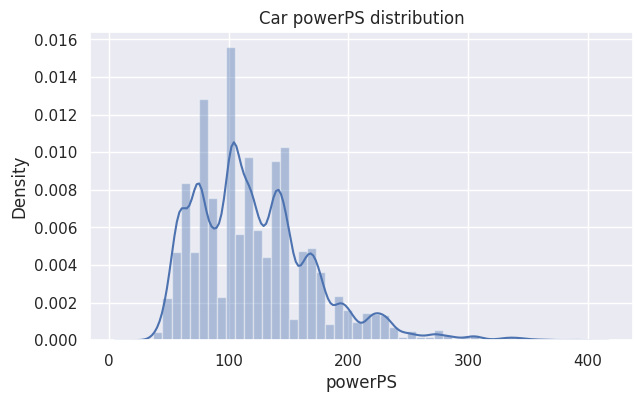

In [ ]:
plt.figure(figsize=(7,4))
sns.distplot(df4_q4['powerPS']);
plt.title('Car powerPS distribution');

quantile for kilometer

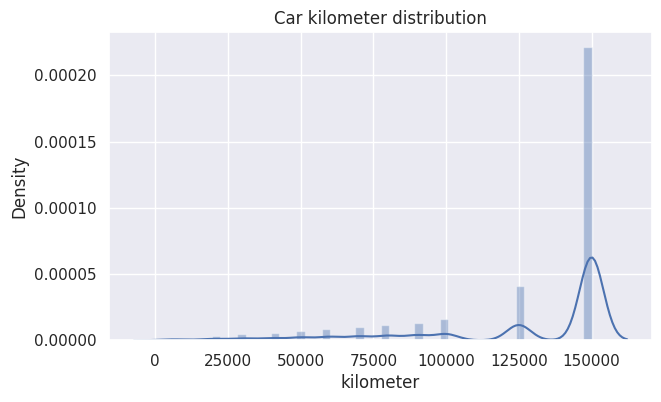

In [ ]:
plt.figure(figsize=(7,4))
sns.distplot(df4_q4['kilometer']);
plt.title('Car kilometer distribution');

In [ ]:
q5= df4_q4['kilometer'].quantile (0.01)
q5

20000.0

In [ ]:
df4_q5 = df4_q4[df4_q4['kilometer']>q5]
df4_q5.describe()

,price,yearOfRegistration,powerPS,kilometer
count,52349.000000,52349.000000,52349.000000,52349.000000
mean,4971.982101,2004.108369,122.093794,129717.855164
std,3907.681182,4.211245,50.279044,33011.636470
min,270.000000,1997.000000,22.000000,30000.000000
25%,1800.000000,2001.000000,83.000000,125000.000000
50%,3800.000000,2004.000000,116.000000,150000.000000
75%,7290.000000,2007.000000,150.000000,150000.000000
max,15950.000000,2017.000000,400.000000,150000.000000


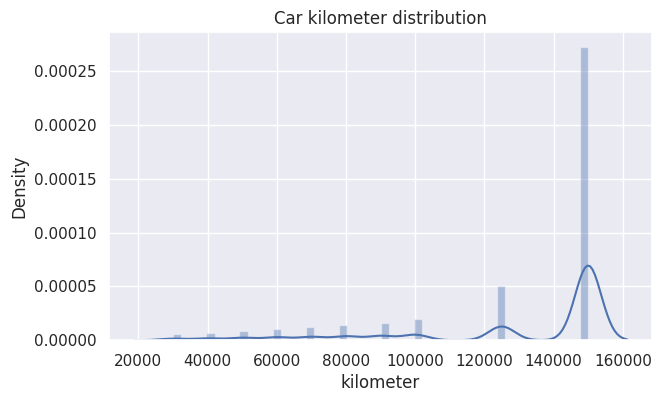

In [ ]:
plt.figure(figsize=(7,4))
sns.distplot(df4_q5['kilometer']);
plt.title('Car kilometer distribution');

Feature extraction

Label encoding

In [ ]:
df4_q5.head(3)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
3,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
6,2200,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein


In [ ]:
#creating dictionary for every categorical column
vehicleType_dic = dict()
gearbox_dic = dict()
model_dic = dict()
fuelType_dic = dict()
brand_dic =dict()
notRepairedDamage_dic =dict()

In [ ]:
#creating encoding column for categorical columns only
from sklearn.preprocessing import LabelEncoder
#creating an instance of the label Encoder
le = LabelEncoder()

In [ ]:
#vehicleType column
df4_q5['vehicleType_enc'] = le.fit_transform(df4_q5['vehicleType'])
for num, lbl in enumerate(le.classes_):
 vehicleType_dic[lbl] = num
print('vehicleType Label saved')

vehicleType Label saved


In [ ]:
#gearbox column
df4_q5['gearbox_enc'] = le.fit_transform(df4_q5['gearbox'])
for num, lbl in enumerate(le.classes_):
 gearbox_dic[lbl] = num
print('gearbox Label saved')

gearbox Label saved


In [ ]:
#model column
df4_q5['model_enc'] = le.fit_transform(df4_q5['model'])
for num, lbl in enumerate(le.classes_):
 model_dic[lbl] = num
print('model Label saved')

model Label saved


In [ ]:
#fuelType column
df4_q5['fuelType_enc'] = le.fit_transform(df4_q5['fuelType'])
for num, lbl in enumerate(le.classes_):
 fuelType_dic[lbl] = num
print('fuelType Label saved')

fuelType Label saved


In [ ]:
#brand column
df4_q5['brand_enc'] = le.fit_transform(df4_q5['brand'])
for num, lbl in enumerate(le.classes_):
 brand_dic[lbl] = num
print('brand Label saved')

brand Label saved


In [ ]:
#notRepairedDamage column
df4_q5['notRepairedDamage_enc'] = le.fit_transform(df4_q5['notRepairedDamage'])
for num, lbl in enumerate(le.classes_):
 notRepairedDamage_dic[lbl] = num
print('notRepairedDamage Label saved')

notRepairedDamage Label saved


In [ ]:
# droping the old categorical column
df5 = df4_q5.drop(['vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage'], axis=1)
df5.head()


,price,yearOfRegistration,powerPS,kilometer,vehicleType_enc,gearbox_enc,model_enc,fuelType_enc,brand_enc,notRepairedDamage_enc
3,1500,2001,75,150000,4,1,112,1,37,1
4,3600,2008,69,90000,4,1,98,3,31,1
6,2200,2004,109,150000,2,1,7,1,25,1
10,2000,2004,105,150000,6,1,9,1,19,1
11,2799,2005,140,150000,5,1,163,3,37,0


Correlation Matrix

In [ ]:

# Calculating the correlation matrix
correlation_matrix = df5.corr()

# Sorting the correlations with the target variable
correlation_with_target = correlation_matrix['price'].sort_values(ascending=False)

# Printing the correlation of each feature with the target variable
print(correlation_with_target)

price                    1.000000
yearOfRegistration       0.703732
powerPS                  0.488828
fuelType_enc             0.221210
notRepairedDamage_enc    0.203789
vehicleType_enc          0.025321
model_enc               -0.036220
brand_enc               -0.110639
gearbox_enc             -0.221618
kilometer               -0.370605
Name: price, dtype: float64


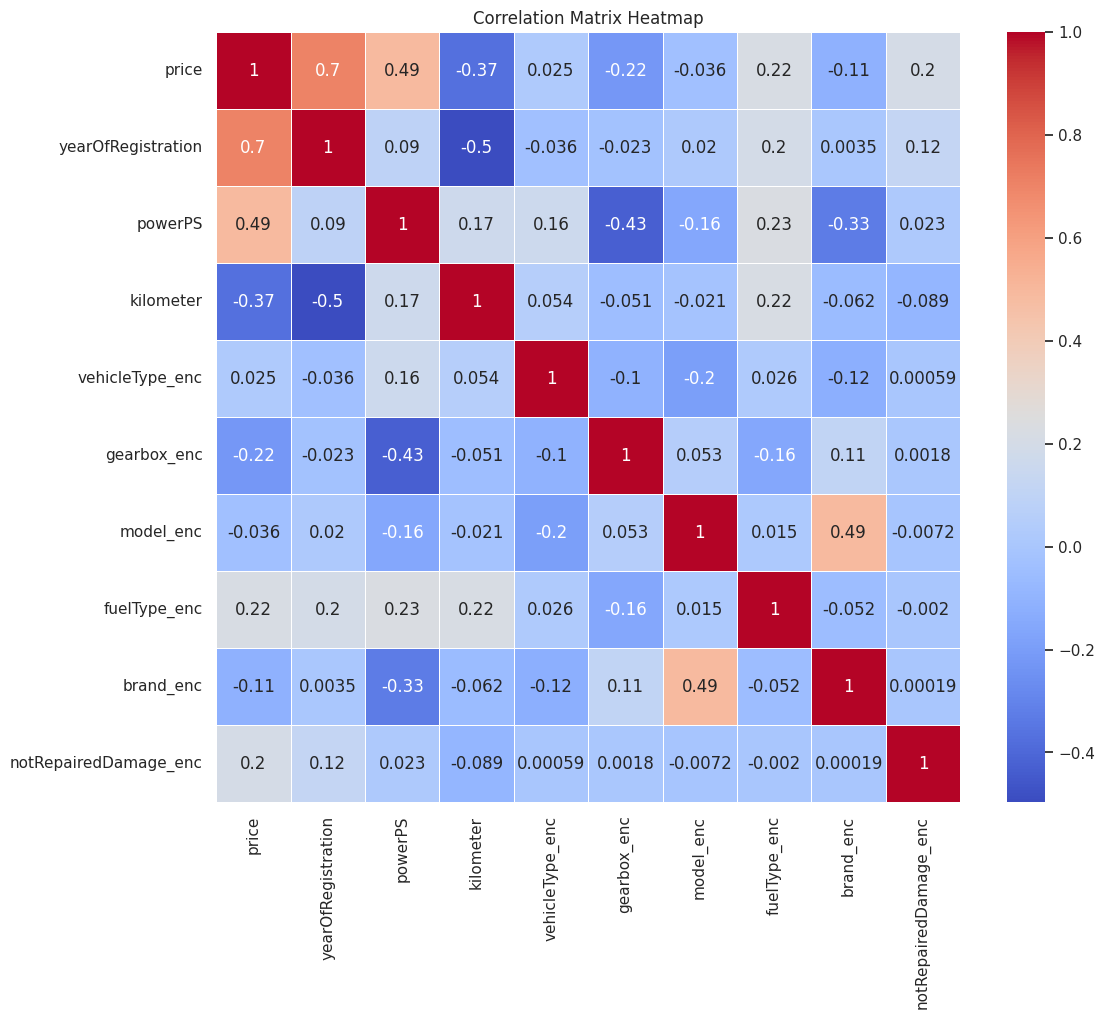

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

separating feature and target

In [ ]:
X = df5.drop(['price'], axis=1).values

In [ ]:
y = df5['price'].values

PCA

In [ ]:
from sklearn.decomposition import PCA

# Computing the PCA for different numbers of components
n_components_range = range(1, min(X.shape) + 1)
bics = []
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    pca.fit(X)
    # Log-likelihood of the data under the model
    log_likelihood = np.sum(pca.score(X))
    # Calculating the BIC score
    num_features = X.shape[1]
    num_samples = X.shape[0]
    bic = -2 * log_likelihood + n_components * np.log(num_samples)
    bics.append(bic)

# Finding the optimal number of components with the lowest BIC score
optimal_n_components = n_components_range[np.argmin(bics)]
print("Optimal number of components according to BIC:", optimal_n_components)

Optimal number of components according to BIC: 1


In [ ]:
# Initializing PCA with the number of components you want to keep
n_components = 1
pca = PCA(n_components=n_components)

# Fitting the model with the scaled data
pca.fit(X)

# Transforming the data into the new coordinate system
X_pca = pca.transform(X)

# Variance explained by each component
print("Variance explained by each component:", pca.explained_variance_ratio_)

# accessing the principal components
print("Principal components:", pca.components_)

Variance explained by each component: [0.99999334]
Principal components: [[ 6.32515692e-05 -2.53896304e-04 -9.99999965e-01 -2.76317497e-06
   6.21450356e-07  4.28592436e-05 -7.32315859e-06  2.43412759e-05
   7.97604823e-07]]


In [ ]:
X_pca.shape

(52349, 1)

Splitting train and test data

In [ ]:
# First, splitting the data into 80% training and 20% combined test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, splitting the remaining 20% into 50% test and 50% validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verifying the shapes of the datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

X_train shape: (41879, 9), y_train shape: (41879,)
X_test shape: (5235, 9), y_test shape: (5235,)
X_val shape: (5235, 9), y_val shape: (5235,)


In [ ]:
X_test

array([[  2007,    115, 150000, ...,      1,     37,      1],
       [  1999,     82, 150000, ...,      1,     20,      1],
       [  2011,    105, 100000, ...,      1,     10,      1],
       ...,
       [  2006,    131, 150000, ...,      3,     27,      1],
       [  2011,     86,  40000, ...,      1,      1,      1],
       [  2006,    140, 150000, ...,      1,     24,      1]])

In [ ]:
X_train

array([[  2010,    105, 150000, ...,      3,     37,      1],
       [  2001,    131, 150000, ...,      1,      1,      1],
       [  2004,    140, 150000, ...,      3,     37,      1],
       ...,
       [  1997,     75, 150000, ...,      1,     37,      1],
       [  1997,    136, 150000, ...,      1,     20,      0],
       [  2001,     60, 150000, ...,      1,     10,      1]])

In [ ]:
X_val

array([[  2008,    163, 150000, ...,      3,      2,      1],
       [  2007,    150,  70000, ...,      1,     37,      1],
       [  2006,    140, 150000, ...,      1,     24,      1],
       ...,
       [  1997,    102, 150000, ...,      1,      2,      1],
       [  1997,     60, 150000, ...,      1,     37,      1],
       [  2008,    131, 150000, ...,      3,     10,      1]])

In [ ]:
y_test

array([ 6750,  1150,  8700, ...,  3899, 11900,  5900])

In [ ]:
y_train

array([4000, 3390, 5900, ..., 1100,  728, 1200])

In [ ]:
y_val

array([ 7200, 12500,  3900, ...,  2999,  1190, 10900])

Random forest

In [ ]:
#importing RandomForest Regressior
from sklearn.ensemble import RandomForestRegressor
#creating instance of randomforest regressor
rf_l = RandomForestRegressor()
#checking the hyperparameter of the randomforest
rf_l.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#creating base model
rf_l.fit(X_train, y_train)

RandomForestRegressor()

Data validation

In [ ]:
#R_2 score
# chceking the socre on validation data.
# importing the r2_score from sklearn
from sklearn.metrics import r2_score

y_pred_val = rf_l.predict(X_val)

print('r2_score : {}'.format(r2_score(y_val, y_pred_val)))

r2_score : 0.859408782944921


In [ ]:
#Mean squared error
# checking the perofrmance on the validation data
y_pred_val = rf_l.predict(X_val)
# importing the rmse from sklearn
from sklearn.metrics import mean_squared_error

mse_val = mean_squared_error(y_val, y_pred_val)

print('MSE on validation data {}'.format(mse_val))

MSE on validation data 2137524.8261527936


In [ ]:
#Root Mean square error
# checking the perofrmance on the validation data
y_pred_val = rf_l.predict(X_val)



rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

print('RMSE on validation data {}'.format(rmse_val))

RMSE on validation data 1462.0276420618022


In [ ]:
#Mean absolute error
# checking the perofrmance on the validation data
y_pred_val = rf_l.predict(X_val)
# importing the mae from sklearn
from sklearn.metrics import mean_absolute_error

mae_val = mean_absolute_error(y_val, y_pred_val)

print('MAE on validation data {}'.format(mae_val))

MAE on validation data 985.1362329305898


In [ ]:
#Mean squared log error
# checking the perofrmance on the validation data
y_pred_val = rf_l.predict(X_val)
# importing the msle from sklearn
from sklearn.metrics import mean_squared_log_error

msle_val = mean_squared_log_error(y_val, y_pred_val)

print('MSLE on validation data {}'.format(msle_val))

MSLE on validation data 0.13254677025128248


In [ ]:
#Mean absolute percentage error
# checking the perofrmance on the validation data
y_pred_val = rf_l.predict(X_val)
# importing the mape from sklearn
from sklearn.metrics import mean_absolute_percentage_error

mape_val = mean_absolute_percentage_error(y_val, y_pred_val)

print('MAPE on validation data {}'.format(mape_val))

MAPE on validation data 0.3058486566559673


In [ ]:
#Median absolute error
# checking the perofrmance on the validation data
y_pred_val = rf_l.predict(X_val)
# importing the mae from sklearn
from sklearn.metrics import median_absolute_error

mdae_val = median_absolute_error(y_val, y_pred_val)

print('MDAE on validation data {}'.format(mdae_val))

MDAE on validation data 634.0799999999999


Performance measurement matrix (Random forest)

1. R_2 score

In [ ]:
# chceking the socre on traning data.
# importing the r2_score from sklearn
from sklearn.metrics import r2_score

y_pred_train = rf_l.predict(X_train)

print('Traning Score: {}'.format(r2_score(y_train, y_pred_train)))


Traning Score: 0.9550946106504303


In [ ]:
# cheeking the socre for testing data

y_pred_test = rf_l.predict(X_test)
print('Testing Score: {}'.format(r2_score(y_test, y_pred_test)))


Testing Score: 0.8622019639241447


2. Mean squared error

In [ ]:
# checking the perofrmance on the training data
y_pred_train = rf_l.predict(X_train)
# importing the rmse from sklearn
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_pred_train)

print('MSE on Traning data {}'.format(mse_train))

MSE on Traning data 685168.6091681448


In [ ]:
# error on testing data
y_pred_test = rf_l.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)

print('MSE on Testing data {}'.format(mse_test))

MSE on Testing data 2125951.41042634


3. Root Mean square error

In [ ]:
# checking the perofrmance on the training data
y_pred_train = rf_l.predict(X_train)



rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train))

RMSE on Traning data 827.7491221186192


In [ ]:
# error on testing data
y_pred_test = rf_l.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))


RMSE on Testing data 1458.0642682770674


4. Mean absolute error

In [ ]:
# checking the perofrmance on the training data
y_pred_train = rf_l.predict(X_train)
# importing the mae from sklearn
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, y_pred_train)

print('MAE on Traning data {}'.format(mae_train))

MAE on Traning data 536.9514330431239


In [ ]:
# error on testing data
y_pred_test = rf_l.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)


print('MAE on Testing data {}'.format(mae_test))

MAE on Testing data 968.1102882325716


5. Mean squared log error

In [ ]:
# checking the perofrmance on the training data
y_pred_train = rf_l.predict(X_train)
# importing the msle from sklearn
from sklearn.metrics import mean_squared_log_error

msle_train = mean_squared_log_error(y_train, y_pred_train)

print('MSLE on Traning data {}'.format(msle_train))

MSLE on Traning data 0.05192905924209154


In [ ]:
# error on testing data
y_pred_test = rf_l.predict(X_test)

msle_test = mean_squared_log_error(y_test, y_pred_test)

print('MSLE on Testing data {}'.format(msle_test))

MSLE on Testing data 0.13172552591777037


6. Mean absolute percentage error

In [ ]:
# checking the perofrmance on the training data
y_pred_train = rf_l.predict(X_train)
# importing the mape from sklearn
from sklearn.metrics import mean_absolute_percentage_error

mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print('MAPE on Traning data {}'.format(mape_train))

MAPE on Traning data 0.16983683000828417


In [ ]:
# error on testing data
y_pred_test = rf_l.predict(X_test)

mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print('MAPE on Testing data {}'.format(mape_test))

MAPE on Testing data 0.3081338344981418


 7. Median absolute error

In [ ]:
# checking the perofrmance on the training data
y_pred_train = rf_l.predict(X_train)
# importing the mae from sklearn
from sklearn.metrics import median_absolute_error

mdae_train = median_absolute_error(y_train, y_pred_train)

print('MDAE on Traning data {}'.format(mdae_train))

MDAE on Traning data 336.09571428571326


In [ ]:
# error on testing data
y_pred_test = rf_l.predict(X_test)

mdae_test = median_absolute_error(y_test, y_pred_test)

print('MDAE on Testing data {}'.format(mdae_test))

MDAE on Testing data 619.5514999999987


8. Max error

In [ ]:
# checking the perofrmance on the training data
y_pred_train = rf_l.predict(X_train)
# importing the mxe from sklearn
from sklearn.metrics import max_error

mxe_train = max_error(y_train, y_pred_train)

print('MXE on Traning data {}'.format(mdae_train))

MXE on Traning data 336.09571428571326


In [ ]:
# error on testing data
y_pred_test = rf_l.predict(X_test)

mxe_test = max_error(y_test, y_pred_test)

print('MXE on Testing data {}'.format(mxe_test))

MXE on Testing data 14138.205


9. Explained variance score

In [ ]:
# checking the perofrmance on the training data
y_pred_train = rf_l.predict(X_train)
# importing the evs from sklearn
from sklearn.metrics import explained_variance_score

evs_train = explained_variance_score(y_train, y_pred_train)

print('EVS on Traning data {}'.format(evs_train))

EVS on Traning data 0.9550954962050713


In [ ]:
# error on testing data
y_pred_test = rf_l.predict(X_test)

evs_test = explained_variance_score(y_test, y_pred_test)

print('EVS on Testing data {}'.format(evs_test))

EVS on Testing data 0.8622192928363898


10. Pinball loss

In [ ]:
# checking the perofrmance on the training data
y_pred_train = rf_l.predict(X_train)
# importing the mpl from sklearn
from sklearn.metrics import mean_pinball_loss

mpl_train = mean_pinball_loss(y_train, y_pred_train)

print('MPL on Traning data {}'.format(mpl_train))

MPL on Traning data 268.47571652156194


In [ ]:
# error on testing data
y_pred_test = rf_l.predict(X_test)

mpl_test = mean_pinball_loss(y_test, y_pred_test)

print('MPL on Testing data {}'.format(mpl_test))

MPL on Testing data 484.0551441162858


11. D² absolute error score

In [ ]:
# checking the perofrmance on the training data
y_pred_train = rf_l.predict(X_train)
# importing the d2ae from sklearn
from sklearn.metrics import d2_absolute_error_score

d2ae_train = d2_absolute_error_score(y_train, y_pred_train)

print('D2AE on Traning data {}'.format(d2ae_train))

D2AE on Traning data 0.8251740974015543


In [ ]:
# error on testing data
y_pred_test = rf_l.predict(X_test)

d2ae_test = d2_absolute_error_score(y_test, y_pred_test)

print('D2AE on Testing data {}'.format(d2ae_test))

D2AE on Testing data 0.6868788358439164


Decision tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Initialize the decision tree regressor
dtr = DecisionTreeRegressor()

# Fit the model to the training data
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

1. R2 score (dtr)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = dtr.predict(X_train)

print('r2_score : {}'.format(r2_score(y_train, y_pred_train)))

r2_score : 0.9661673614633112


In [ ]:
# error on testing data
y_pred_test = dtr.predict(X_test)

print('r2_score : {}'.format(r2_score(y_test, y_pred_test)))

r2_score : 0.7904780737655239


2. MSE(dtr)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = dtr.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)

print('MSE on Traning data {}'.format(mse_train))

MSE on Traning data 516220.04009845643


In [ ]:
# error on testing data
y_pred_test = dtr.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)

print('MSE on Testing data {}'.format(mse_test))

MSE on Testing data 3232509.310569744


3. RMSE (dtr)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = dtr.predict(X_train)



rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train))



RMSE on Traning data 718.4845440915598


In [ ]:
# error on testing data
y_pred_test = dtr.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))

RMSE on Testing data 1797.9180489026035


4. MAE (dtr)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = dtr.predict(X_train)


mae_train = mean_absolute_error(y_train, y_pred_train)

print('MAE on Traning data {}'.format(mae_train))

MAE on Traning data 349.9264161498631


In [ ]:
# error on testing data
y_pred_test = dtr.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)

print('MAE on Testing data {}'.format(mae_test))

MAE on Testing data 1145.4698130199295


5. Mean squared log error (dtr)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = dtr.predict(X_train)


msle_train = mean_squared_log_error(y_train, y_pred_train)

print('MSLE on Traning data {}'.format(msle_train))

MSLE on Traning data 0.03760736117736116


In [ ]:
# error on testing data
y_pred_test = dtr.predict(X_test)

msle_test = mean_squared_log_error(y_test, y_pred_test)

print('MSLE on Testing data {}'.format(msle_test))

MSLE on Testing data 0.1862194845748708


6. Mean absolute percentage error (dtr)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = dtr.predict(X_train)


mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print('MAPE on Traning data {}'.format(mape_train))

MAPE on Traning data 0.11289774628775526


In [ ]:
# error on testing data
y_pred_test = dtr.predict(X_test)

mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print('MAPE on Testing data {}'.format(mape_test))

MAPE on Testing data 0.3478385065191277


 7. Median absolute error (dtr)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = dtr.predict(X_train)


mdae_train = median_absolute_error(y_train, y_pred_train)

print('MDAE on Traning data {}'.format(mdae_train))

MDAE on Traning data 50.0


In [ ]:
# error on testing data
y_pred_test = dtr.predict(X_test)

mdae_test = median_absolute_error(y_test, y_pred_test)

print('MDAE on Testing data {}'.format(mdae_test))

MDAE on Testing data 700.0


8. Max error (dtr)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = dtr.predict(X_train)


mxe_train = max_error(y_train, y_pred_train)

print('MXE on Traning data {}'.format(mdae_train))

MXE on Traning data 50.0


In [ ]:
# error on testing data
y_pred_test = dtr.predict(X_test)

mxe_test = max_error(y_test, y_pred_test)

print('MXE on Testing data {}'.format(mxe_test))

MXE on Testing data 15425.0


9. Explained variance score (dtr)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = dtr.predict(X_train)


evs_train = explained_variance_score(y_train, y_pred_train)

print('EVS on Traning data {}'.format(evs_train))

EVS on Traning data 0.9661673614633112


In [ ]:
# error on testing data
y_pred_test = dtr.predict(X_test)

evs_test = explained_variance_score(y_test, y_pred_test)

print('EVS on Testing data {}'.format(evs_test))

EVS on Testing data 0.7905115840359845


10. Pinball loss (dtr)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = dtr.predict(X_train)


mpl_train = mean_pinball_loss(y_train, y_pred_train)

print('MPL on Traning data {}'.format(mpl_train))

MPL on Traning data 174.96320807493154


In [ ]:
# error on testing data
y_pred_test = dtr.predict(X_test)

mpl_test = mean_pinball_loss(y_test, y_pred_test)

print('MPL on Testing data {}'.format(mpl_test))

MPL on Testing data 572.7349065099647


11. D² absolute error score (dtr)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = dtr.predict(X_train)


d2ae_train = d2_absolute_error_score(y_train, y_pred_train)

print('D2AE on Traning data {}'.format(d2ae_train))

D2AE on Traning data 0.8860675327753043


In [ ]:
# error on testing data
y_pred_test = dtr.predict(X_test)

d2ae_test = d2_absolute_error_score(y_test, y_pred_test)

print('D2AE on Testing data {}'.format(d2ae_test))

D2AE on Testing data 0.6295144822670375


Visual Representation

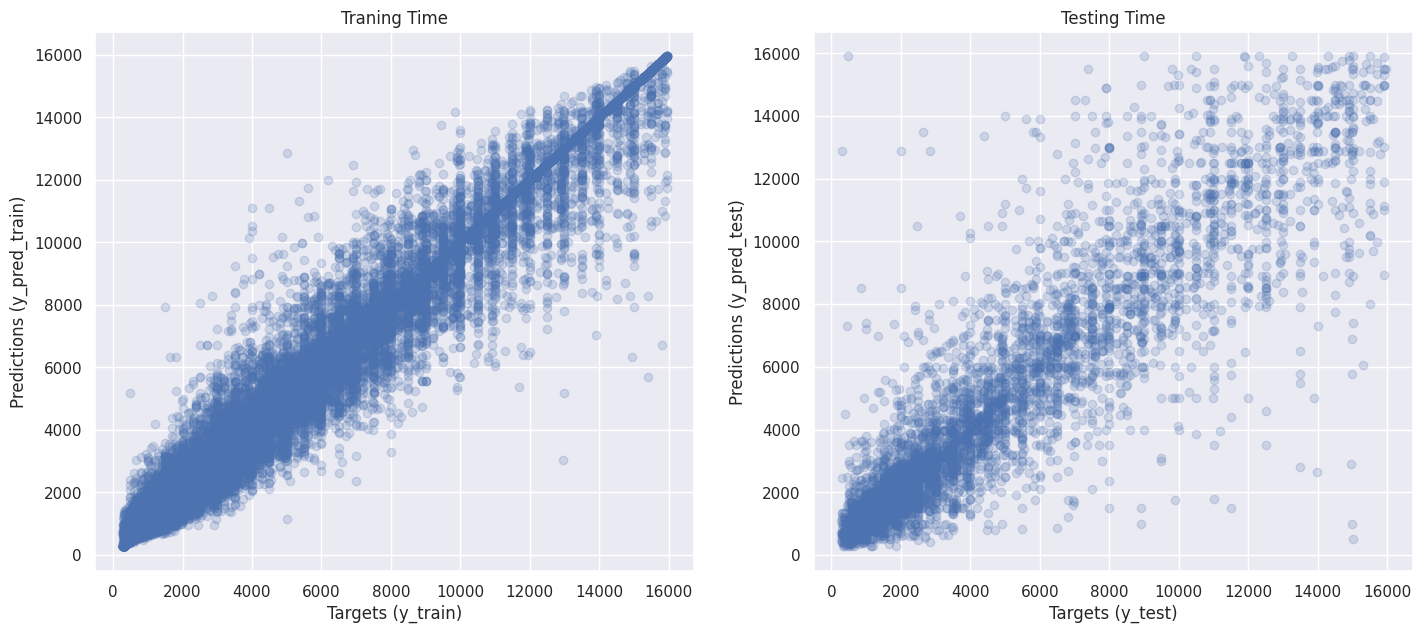

In [ ]:
#train vs test values
# plotting the traning
# checking the prediction with the original values
plt.figure(figsize=(17,7))
y_pred_train = dtr.predict(X_train)
plt.subplot (1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Traning Time');

# plotting testing error
y_pred_test = dtr.predict(X_test)
plt.subplot(1,2,2)
plt.scatter (y_test, y_pred_test, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_test)');
plt.title('Testing Time');

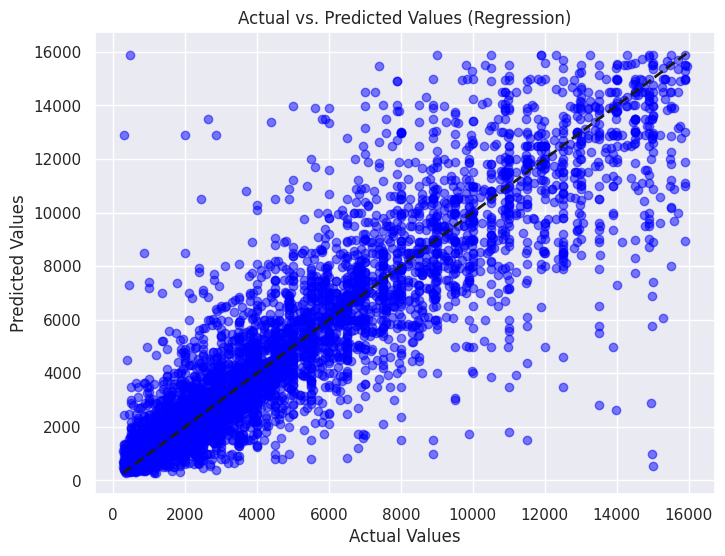

In [ ]:

# Creating a scatter plot to compare actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted Values (Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()



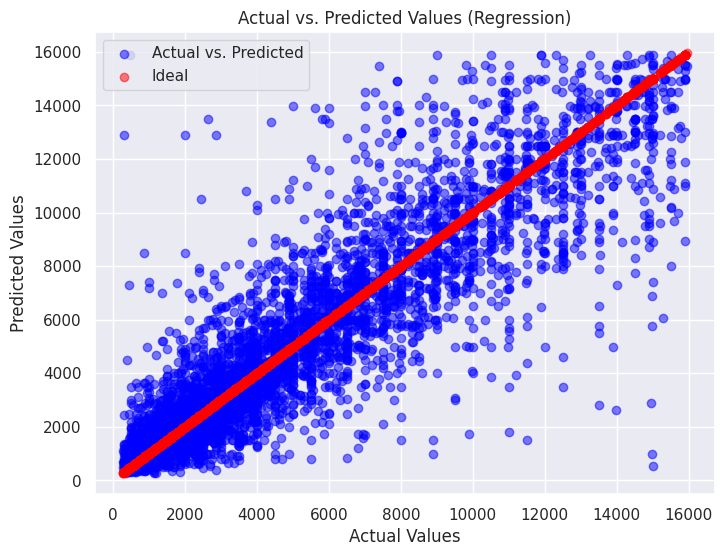

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5, label='Actual vs. Predicted')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Ideal')
plt.title('Actual vs. Predicted Values (Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

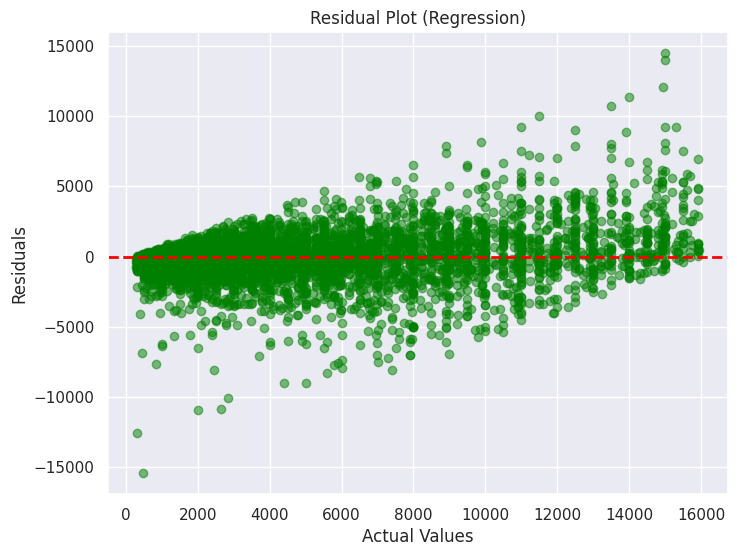

In [ ]:
# Calculatng residuals
residuals = y_test - y_pred_test

# Creating a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot (Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initializing the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=4)

# Fitting the model to the training data
knn_regressor.fit(X_train, y_train)

# Predicting the target values for the testing data
y_pred = knn_regressor.predict(X_test)

# Calculating mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)

# Printing the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 3258195.95
R2 Score: 0.79


1. R2 score (KNN)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = knn_regressor.predict(X_train)

print('r2_score : {}'.format(r2_score(y_train, y_pred_train)))

r2_score : 0.872465184292978


In [ ]:
# error on testing data
y_pred_test = knn_regressor.predict(X_test)

print('r2_score : {}'.format(r2_score(y_test, y_pred_test)))

r2_score : 0.7888131397861963


2. MSE(KNN)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = knn_regressor.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)

print('MSE on Traning data {}'.format(mse_train))

MSE on Traning data 1945932.405089663


In [ ]:
# error on testing data
y_pred_test = knn_regressor.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)

print('MSE on Testing data {}'.format(mse_test))

MSE on Testing data 3258195.951993792


3. RMSE (KNN)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = knn_regressor.predict(X_train)



rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train))



RMSE on Traning data 1394.966811465299


In [ ]:
# error on testing data
y_pred_test = knn_regressor.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))

RMSE on Testing data 1805.0473545017571


4. MAE (KNN)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = knn_regressor.predict(X_train)


mae_train = mean_absolute_error(y_train, y_pred_train)

print('MAE on Traning data {}'.format(mae_train))

MAE on Traning data 929.6161680078321


In [ ]:
# error on testing data
y_pred_test = knn_regressor.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)

print('MAE on Testing data {}'.format(mae_test))

MAE on Testing data 1202.8410219675263


5. Mean squared log error (KNN)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = knn_regressor.predict(X_train)


msle_train = mean_squared_log_error(y_train, y_pred_train)

print('MSLE on Traning data {}'.format(msle_train))

MSLE on Traning data 0.11851363147592452


In [ ]:
# error on testing data
y_pred_test = knn_regressor.predict(X_test)

msle_test = mean_squared_log_error(y_test, y_pred_test)

print('MSLE on Testing data {}'.format(msle_test))

MSLE on Testing data 0.17737292194728013


6. Mean absolute percentage error (KNN)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = knn_regressor.predict(X_train)


mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print('MAPE on Traning data {}'.format(mape_train))

MAPE on Traning data 0.2918067113407383


In [ ]:
# error on testing data
y_pred_test = knn_regressor.predict(X_test)

mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print('MAPE on Testing data {}'.format(mape_test))

MAPE on Testing data 0.37592834487942406


 7. Median absolute error (KNN)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = knn_regressor.predict(X_train)


mdae_train = median_absolute_error(y_train, y_pred_train)

print('MDAE on Traning data {}'.format(mdae_train))

MDAE on Traning data 581.0


In [ ]:
# error on testing data
y_pred_test = knn_regressor.predict(X_test)

mdae_test = median_absolute_error(y_test, y_pred_test)

print('MDAE on Testing data {}'.format(mdae_test))

MDAE on Testing data 750.0


8. Max error (KNN)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = knn_regressor.predict(X_train)


mxe_train = max_error(y_train, y_pred_train)

print('MXE on Traning data {}'.format(mdae_train))

MXE on Traning data 581.0


In [ ]:
# error on testing data
y_pred_test = knn_regressor.predict(X_test)

mxe_test = max_error(y_test, y_pred_test)

print('MXE on Testing data {}'.format(mxe_test))

MXE on Testing data 11399.75


9. Explained variance score (KNN)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = knn_regressor.predict(X_train)


evs_train = explained_variance_score(y_train, y_pred_train)

print('EVS on Traning data {}'.format(evs_train))

EVS on Traning data 0.8724683874801427


In [ ]:
# error on testing data
y_pred_test = knn_regressor.predict(X_test)

evs_test = explained_variance_score(y_test, y_pred_test)

print('EVS on Testing data {}'.format(evs_test))

EVS on Testing data 0.7888338273539539


10. Pinball loss (KNN)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = knn_regressor.predict(X_train)


mpl_train = mean_pinball_loss(y_train, y_pred_train)

print('MPL on Traning data {}'.format(mpl_train))

MPL on Traning data 464.80808400391606


In [ ]:
# error on testing data
y_pred_test = knn_regressor.predict(X_test)

mpl_test = mean_pinball_loss(y_test, y_pred_test)

print('MPL on Testing data {}'.format(mpl_test))

MPL on Testing data 601.4205109837632


11. D² absolute error score (KNN)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = knn_regressor.predict(X_train)


d2ae_train = d2_absolute_error_score(y_train, y_pred_train)

print('D2AE on Traning data {}'.format(d2ae_train))

D2AE on Traning data 0.697326470066381


In [ ]:
# error on testing data
y_pred_test = knn_regressor.predict(X_test)

d2ae_test = d2_absolute_error_score(y_test, y_pred_test)

print('D2AE on Testing data {}'.format(d2ae_test))

D2AE on Testing data 0.6109586008214333


Neural Network Regression (NNR)

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluating the model on the test set
y_pred = model.predict(X_test_scaled)

# Calculating mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)

# Printing the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Epoch 1/50
1047/1047 [==============================] - 7s 5ms/step - loss: 22447742.0000 - val_loss: 5089662.0000
Epoch 2/50
1047/1047 [==============================] - 4s 4ms/step - loss: 4112503.7500 - val_loss: 3906213.7500
Epoch 3/50
1047/1047 [==============================] - 5s 4ms/step - loss: 3692732.7500 - val_loss: 3762945.0000
Epoch 4/50
1047/1047 [==============================] - 8s 8ms/step - loss: 3604596.2500 - val_loss: 3689779.2500
Epoch 5/50
1047/1047 [==============================] - 8s 8ms/step - loss: 3551348.2500 - val_loss: 3647046.7500
Epoch 6/50
1047/1047 [==============================] - 5s 5ms/step - loss: 3509948.0000 - val_loss: 3620942.0000
Epoch 7/50
1047/1047 [==============================] - 8s 7ms/step - loss: 3477506.0000 - val_loss: 3576524.2500
Epoch 8/50
1047/1047 [==============================] - 8s 8ms/step - loss: 3449662.0000 - val_loss: 3548352.5000
Epoch 9/50
1047/1047 [==============================] - 5s 4ms/step - loss: 3423131.000

1. R2 score (NNR)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = model.predict(X_train_scaled)

print('r2_score : {}'.format(r2_score(y_train, y_pred_train)))

1309/1309 [==============================] - 2s 2ms/step
r2_score : 0.8039699925719461


In [ ]:
# error on testing data
y_pred_test = model.predict(X_test)

print('r2_score : {}'.format(r2_score(y_test, y_pred_test)))

164/164 [==============================] - 0s 1ms/step
r2_score : -369571139.8004276


2. MSE(NNR)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = model.predict(X_train_scaled)

mse_train = mean_squared_error(y_train, y_pred_train)

print('MSE on Traning data {}'.format(mse_train))

1309/1309 [==============================] - 2s 2ms/step
MSE on Traning data 2991035.363241713


In [ ]:
# error on testing data
y_pred_test = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)

print('MSE on Testing data {}'.format(mse_test))

164/164 [==============================] - 1s 4ms/step
MSE on Testing data 5701752437204781.0


3. RMSE (NNR)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = model.predict(X_train_scaled)



rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train))



1309/1309 [==============================] - 6s 4ms/step
RMSE on Traning data 1729.4610036776526


In [ ]:
# error on testing data
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))

164/164 [==============================] - 0s 3ms/step
RMSE on Testing data 75509949.25971532


4. MAE (NNR)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = model.predict(X_train_scaled)


mae_train = mean_absolute_error(y_train, y_pred_train)

print('MAE on Traning data {}'.format(mae_train))

1309/1309 [==============================] - 4s 3ms/step
MAE on Traning data 1191.8910632838395


In [ ]:
# error on testing data
y_pred_test = model.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)

print('MAE on Testing data {}'.format(mae_test))

164/164 [==============================] - 1s 5ms/step
MAE on Testing data 73489571.1730659


Gradient Boosting Regression (GBR)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fitting the model to the training data
gbr.fit(X_train_scaled, y_train)

# Predicting the target values for the testing data
y_pred = gbr.predict(X_test_scaled)

# Calculating mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)

# Printing the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 2526274.48
R2 Score: 0.84


1. R2 score (GBR)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = gbr.predict(X_train_scaled)

print('r2_score : {}'.format(r2_score(y_train, y_pred_train)))

r2_score : 0.8420636704979133


In [ ]:
# error on testing data
y_pred_test = gbr.predict(X_test)

print('r2_score : {}'.format(r2_score(y_test, y_pred_test)))

r2_score : -3.1860946214889445


2. MSE(GBR)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = gbr.predict(X_train_scaled)

mse_train = mean_squared_error(y_train, y_pred_train)

print('MSE on Traning data {}'.format(mse_train))

MSE on Traning data 2409800.177428001


In [ ]:
# error on testing data
y_pred_test = gbr.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)

print('MSE on Testing data {}'.format(mse_test))

MSE on Testing data 64583168.36847776


3. RMSE (GBR)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = gbr.predict(X_train_scaled)



rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train))



RMSE on Traning data 1552.353109774964


In [ ]:
# error on testing data
y_pred_test = gbr.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))

RMSE on Testing data 8036.365370519048


4. MAE (GBR)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = gbr.predict(X_train_scaled)


mae_train = mean_absolute_error(y_train, y_pred_train)

print('MAE on Traning data {}'.format(mae_train))

MAE on Traning data 1086.62353247784


In [ ]:
# error on testing data
y_pred_test = gbr.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)

print('MAE on Testing data {}'.format(mae_test))

MAE on Testing data 7279.74349326881


Linear regression

In [ ]:
#standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression
# Initializing the linear regression model
lr = LinearRegression()

# Fitting the model to the training data
lr.fit(X_scaled, y_train)


LinearRegression()

1. R2 score (lr)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = lr.predict(X_scaled)

print('r2_score : {}'.format(r2_score(y_train, y_pred_train)))

r2_score : 0.7122655749443623


In [ ]:
# error on testing data
y_pred_test = lr.predict(X_test)

print('r2_score : {}'.format(r2_score(y_test, y_pred_test)))

r2_score : -467395345.62756616


2. MSE(lr)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = lr.predict(X_scaled)

mse_train = mean_squared_error(y_train, y_pred_train)

print('MSE on Traning data {}'.format(mse_train))

MSE on Traning data 4390265.8162133545


In [ ]:
# error on testing data
y_pred_test = lr.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)

print('MSE on Testing data {}'.format(mse_test))

MSE on Testing data 7210986634400149.0


3. RMSE (lr)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = lr.predict(X_scaled)



rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train))



RMSE on Traning data 2095.2961165938705


In [ ]:
# error on testing data
y_pred_test = lr.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))

RMSE on Testing data 84917528.42847082


4. MAE (lr)

In [ ]:
# checking the perofrmance on the training data
y_pred_train = lr.predict(X_scaled)


mae_train = mean_absolute_error(y_train, y_pred_train)

print('MAE on Traning data {}'.format(mae_train))

MAE on Traning data 1598.0142136236047


In [ ]:
# error on testing data
y_pred_test = lr.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)

print('MAE on Testing data {}'.format(mae_test))

MAE on Testing data 82146670.7255378
